Datos meteorológicos actuales:



,Ciudad,Temperatura,Viento,Dirección viento (°)
0,Montevideo,28.2,18.6,18
1,Madrid,20.9,7.9,133
2,Lisbon,24.5,1.3,146
3,Buenos Aires,27.3,14.6,52
4,London,14.8,6.9,28



Estadísticas generales:


,Temperatura,Viento,Dirección viento (°)
count,5.000000,5.000000,5.000000
mean,23.140000,9.860000,75.400000
std,5.461959,6.795808,59.981664
min,14.800000,1.300000,18.000000
25%,20.900000,6.900000,28.000000
50%,24.500000,7.900000,52.000000
75%,27.300000,14.600000,133.000000
max,28.200000,18.600000,146.000000



Ciudad más cálida: Montevideo
Ciudad con viento más intenso: Montevideo


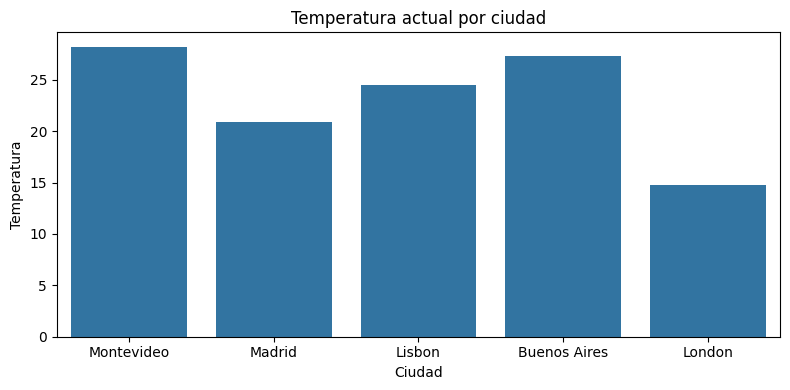

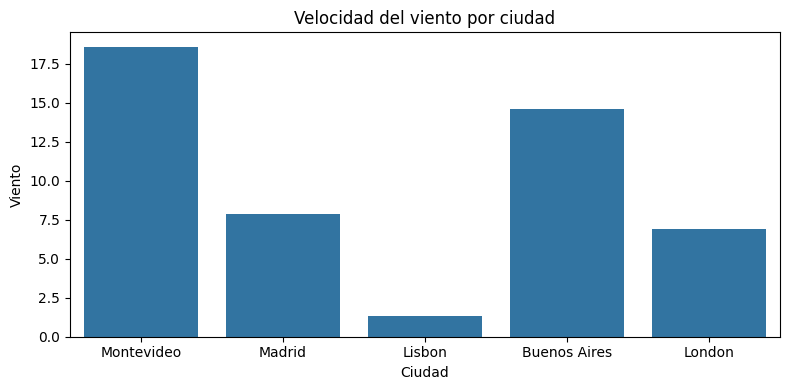


Esta práctica demuestra cómo consumir datos JSON de una API pública 
sin necesidad de autenticación. Los datos se transformaron en un DataFrame
de pandas y se visualizaron con Seaborn, mostrando una aplicación práctica
de la ingeniería de datos con fuentes dinámicas y abiertas.



In [3]:

import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cities = {
    "Montevideo": (-34.9011, -56.1645),
    "Madrid": (40.4168, -3.7038),
    "Lisbon": (38.7223, -9.1393),
    "Buenos Aires": (-34.6037, -58.3816),
    "London": (51.5072, -0.1276)
}

data = []

for city, (lat, lon) in cities.items():
    url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current_weather=true"
    response = requests.get(url)
    
    if response.status_code == 200:
        json_data = response.json()
        info = {
            "Ciudad": city,
            "Temperatura": json_data["current_weather"]["temperature"],
            "Viento": json_data["current_weather"]["windspeed"],
            "Dirección viento (°)": json_data["current_weather"]["winddirection"]
        }
        data.append(info)
    else:
        print(f"Error al obtener datos para {city}: {response.status_code}")


df = pd.DataFrame(data)
print("Datos meteorológicos actuales:\n")
display(df)


print("\nEstadísticas generales:")
display(df.describe())

# Ciudad más cálida y con mayor viento
ciudad_calida = df.loc[df["Temperatura"].idxmax(), "Ciudad"]
ciudad_viento = df.loc[df["Viento"].idxmax(), "Ciudad"]

print(f"\nCiudad más cálida: {ciudad_calida}")
print(f"Ciudad con viento más intenso: {ciudad_viento}")


# Temperatura
plt.figure(figsize=(8,4))
sns.barplot(x="Ciudad", y="Temperatura", data=df)
plt.title("Temperatura actual por ciudad")
plt.tight_layout()
plt.show()

# Viento
plt.figure(figsize=(8,4))
sns.barplot(x="Ciudad", y="Viento", data=df)
plt.title("Velocidad del viento por ciudad")
plt.tight_layout()
plt.show()

print("""
Esta práctica demuestra cómo consumir datos JSON de una API pública 
sin necesidad de autenticación. Los datos se transformaron en un DataFrame
de pandas y se visualizaron con Seaborn, mostrando una aplicación práctica
de la ingeniería de datos con fuentes dinámicas y abiertas.
""")
